In [3]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt

import numpy as np
import random

from mxnet import nd
from mxnet import autograd

In [11]:
num_of_features = 2
num_of_examples = 1000
w_true = nd.array([3, -4.2]).reshape([num_of_features, 1])
b_true = 6.7
print(w_true)
print(b_true)

X_feats = nd.random.normal(0, 1, [num_of_examples, num_of_features])
y_true = nd.dot(X_feats, w_true) + b_true + nd.random.normal(0, 0.01, [num_of_examples, 1])
print(X_feats.shape)
print(y_true.shape)


[[ 3. ]
 [-4.2]]
<NDArray 2x1 @cpu(0)>
6.7
(1000, 2)
(1000, 1)


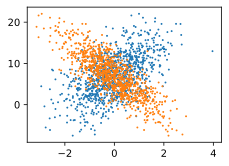

In [15]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(X_feats[:, 0].asnumpy(), y_true.asnumpy(), 1);
plt.scatter(X_feats[:, 1].asnumpy(), y_true.asnumpy(), 1);

In [19]:
def data_iter(batch_size, features, labels):
    N = len(features)
    indices = list(range(N))
    random.shuffle(indices)
    for i in range(0, N, batch_size):
        j = nd.array(indices[i: min(i + batch_size, N)])
        yield features.take(j), labels.take(j)

batch_size = 10
for X, y in data_iter(batch_size, X_feats, y_true):
    print(X, y)
    break


[[-0.26354876 -0.65134335]
 [-0.22573367  0.00560621]
 [ 1.686185   -0.6460936 ]
 [ 1.8237506  -0.22492728]
 [-0.22547057  1.8016744 ]
 [-0.4011213  -0.15199077]
 [-0.6329629   0.8684925 ]
 [ 2.020386   -0.00916616]
 [ 0.2709228   0.66479117]
 [ 0.84431016  0.12143756]]
<NDArray 10x2 @cpu(0)> 
[[ 8.637855 ]
 [ 5.984886 ]
 [14.476036 ]
 [13.122317 ]
 [-1.5539458]
 [ 6.119403 ]
 [ 1.164149 ]
 [12.801328 ]
 [ 4.7183967]
 [ 8.724886 ]]
<NDArray 10x1 @cpu(0)>


In [25]:
w = nd.random.normal(0, 0.01, [num_of_features, 1])
b = nd.zeros(shape=(1,))
w.attach_grad()
b.attach_grad()

In [26]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

In [27]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [28]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [29]:
lr = 0.03
num_of_epochs = 3
net = linreg
loss = squared_loss

for ep in range(num_of_epochs):
    for X, y in data_iter(batch_size, X_feats, y_true):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(X_feats, w, b), y_true)
    print('epoch %d, loss %f' % (ep + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.063691
epoch 2, loss 0.000176
epoch 3, loss 0.000054


In [30]:
w_true, w

(
 [[ 3. ]
  [-4.2]]
 <NDArray 2x1 @cpu(0)>, 
 [[ 2.998385 ]
  [-4.1997485]]
 <NDArray 2x1 @cpu(0)>)

In [31]:
b_true, b

(6.7, 
 [6.699371]
 <NDArray 1 @cpu(0)>)